In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# RoBERTa

In [2]:
with open('run-metrics-roberta-base.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8311789035797119, 'full_set_var_values': [0.05376775562763214, 0.02616167813539505, 0.023240013048052788, 0.0192248597741127, 0.018540360033512115, 0.016556788235902786, 0.016194546595215797, 0.01509044785052538, 0.01413337979465723, 0.012723829597234726, 0.012686582282185555, 0.011885247193276882, 0.01123821921646595, 0.011053971946239471, 0.01008811965584755, 0.009967572055757046, 0.009077201597392559, 0.008785417303442955, 0.008644886314868927, 0.008430810645222664, 0.007931236177682877, 0.007820423692464828, 0.007657319772988558, 0.007310896646231413, 0.007128255907446146, 0.0069785090163350105, 0.006772259250283241, 0.006690643727779388, 0.006643603555858135, 0.006252130959182978, 0.0061791446059942245, 0.006112937815487385, 0.005919185932725668, 0.005811081733554602, 0.0056817783042788506, 0.005569051951169968, 0.005443736910820007, 0.005392815452069044, 0.005240216385573149, 0.005223921500146389, 0.005062836688011885, 0.005008131265640

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-roberta-base/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
results = {}

In [7]:
results['subset_size'] = modelling_metrics['subset_size']
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [8]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [9]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy
0,5387,0.822537,0.899926,0.261583,0.413638,0.84080,1.249346,0.448606,0.241239,0.904868
1,10774,0.827673,0.918040,0.228625,0.419021,0.84508,1.332623,0.492941,0.236111,0.912500
2,16161,0.829468,0.917001,0.217153,0.392675,0.82276,0.979402,0.521177,0.241190,0.897211
3,21548,0.830259,0.916407,0.227022,0.504235,0.80348,1.052648,0.563819,0.275241,0.894079
4,26935,0.830867,0.930661,0.204320,0.475700,0.82812,1.394213,0.487467,0.272754,0.896947
5,32322,0.831026,0.924128,0.231794,0.380329,0.85168,0.790503,0.610027,0.268371,0.908658
6,37709,0.831401,0.925019,0.211466,0.433677,0.81900,1.336885,0.510084,0.275871,0.886526
7,43096,0.831556,0.936451,0.221444,0.483949,0.84452,1.327225,0.587733,0.330582,0.886816
8,48483,0.831792,0.925167,0.212632,0.371738,0.84716,0.906893,0.556832,0.253999,0.900053
9,53870,0.831864,0.943281,0.172950,0.418257,0.85644,1.303476,0.552330,0.289401,0.903342


In [10]:
results_df['mean_odd_accuracy'] = results_df[['imdb_accuracy', 'tweet_eval_accuracy', 'yelp_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['imdb_loss', 'tweet_eval_loss', 'yelp_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,5387,0.822537,0.899926,0.261583,0.413638,0.84080,1.249346,0.448606,0.241239,0.904868,0.731425,0.634741
1,10774,0.827673,0.918040,0.228625,0.419021,0.84508,1.332623,0.492941,0.236111,0.912500,0.750174,0.662585
2,16161,0.829468,0.917001,0.217153,0.392675,0.82276,0.979402,0.521177,0.241190,0.897211,0.747049,0.537755
3,21548,0.830259,0.916407,0.227022,0.504235,0.80348,1.052648,0.563819,0.275241,0.894079,0.753793,0.610708
4,26935,0.830867,0.930661,0.204320,0.475700,0.82812,1.394213,0.487467,0.272754,0.896947,0.737511,0.714222
5,32322,0.831026,0.924128,0.231794,0.380329,0.85168,0.790503,0.610027,0.268371,0.908658,0.790122,0.479734
6,37709,0.831401,0.925019,0.211466,0.433677,0.81900,1.336885,0.510084,0.275871,0.886526,0.738537,0.682144
7,43096,0.831556,0.936451,0.221444,0.483949,0.84452,1.327225,0.587733,0.330582,0.886816,0.773023,0.713919
8,48483,0.831792,0.925167,0.212632,0.371738,0.84716,0.906893,0.556832,0.253999,0.900053,0.768015,0.510877
9,53870,0.831864,0.943281,0.172950,0.418257,0.85644,1.303476,0.552330,0.289401,0.903342,0.770704,0.670378


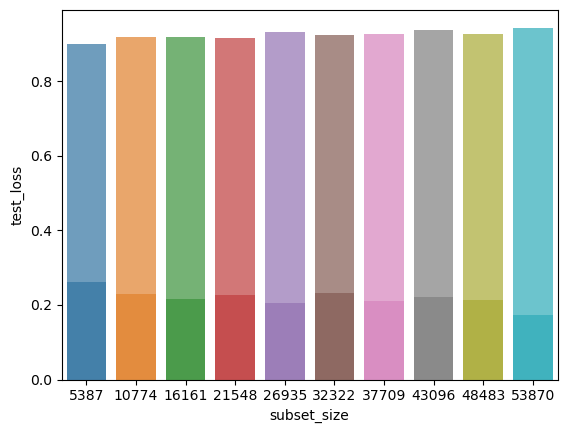

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)

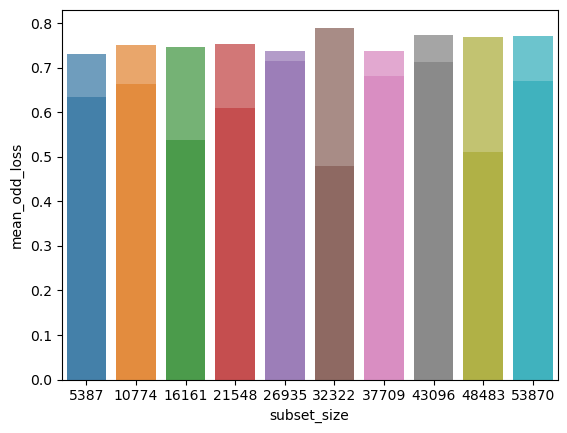

In [14]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)


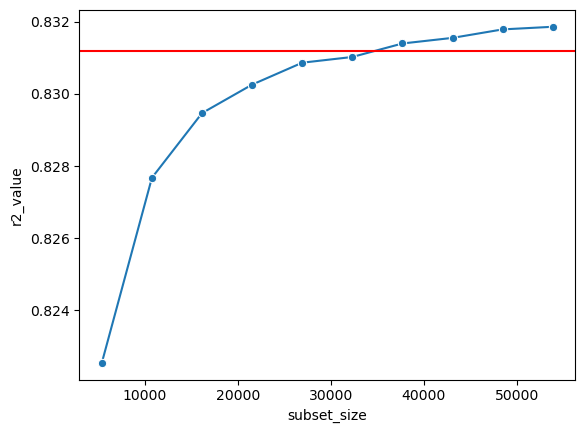

In [15]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

# RoBERTa

In [ ]:
file_list = glob.glob('./Eval-Results-roberta-base/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed